# Task 4: Normality

In [1]:
# install.packages('gdata')     # to read in spreadsheets
# install.packages('dplyr')     # filtering, mapping and aggregating functionality
# install.packages("nortest")   # additional: Anderson-Darling-Test

In [2]:
library(nortest)                # Anderson-Darling normality test
library(dplyr)                  # processing
library(readxl)                 # reading in spreadsheet


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
gaming_data <- read_excel("datasets/DB01_gaming_video_quality_dataset.xlsx")
gaming_data <- gaming_data %>% filter(Game == 'Game4') %>% filter(Condition == 26) %>% select(VQ)
video_quality_ratings = gaming_data[['VQ']]

In [4]:
kolmogrow_smirnov = ks.test(video_quality_ratings, "pnorm", mean=mean(gaming_data[['VQ']]), sd=sd(gaming_data[['VQ']])) 
kolmogrow_smirnov   
# p >> 0.05: null hypothesis of normality not rejected

Warning message in ks.test(video_quality_ratings, "pnorm", mean = mean(gaming_data[["VQ"]]), :
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  video_quality_ratings
D = 0.13837, p-value = 0.7935
alternative hypothesis: two-sided


In [5]:
shapiro_wilk = shapiro.test(video_quality_ratings)
shapiro_wilk        
# p >> 0.05: null hypothesis of normality not rejected


	Shapiro-Wilk normality test

data:  video_quality_ratings
W = 0.9774, p-value = 0.8709


In [6]:
ad.test(video_quality_ratings)
# p >> 0.05: null hypothesis of normality not rejected


	Anderson-Darling normality test

data:  video_quality_ratings
A = 0.20594, p-value = 0.8513


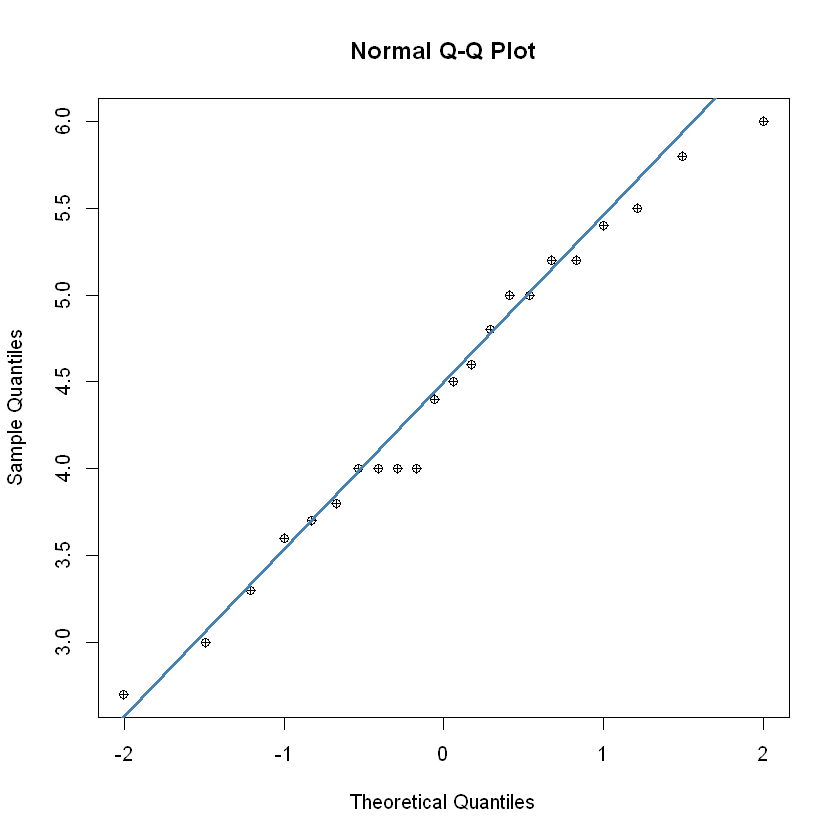

In [7]:
# QQ plot: small residuals?

qqnorm(video_quality_ratings, pch = 10, frame = TRUE)
qqline(video_quality_ratings, col = "steelblue", lwd = 3)